In [9]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import numpy as np
from py4j.java_gateway import JavaGateway, GatewayParameters

In [2]:
gateway = JavaGateway(gateway_parameters=GatewayParameters(auto_field=True, auto_convert=True))
app = gateway.entry_point
rup_set = app.loadRupSet("rupSetBruceRundir5883.zip")
sections = rup_set.getFaultSectionDataList()
coulomb = app.getCoulombTester(rup_set, "stiffnessCaches")
coulomb.setupStiffness()
agg_calc = coulomb.filters.get(1).getAggCalc()
threshold =  coulomb.filters.get(1).getThreshold()

In [3]:
def rupture_stats(ruptureId):
    sectionIds = rup_set.getSectionsIndicesForRup(ruptureId)
    rupture = [sections.get(s) for s in sectionIds]
    subduction = [s for s in rupture if "row:" in s.getSectionName()]
    crustal = [s for s in rupture if "row:" not in s.getSectionName()]

    return [
        sum([s.getArea(False) for s in subduction]),
        sum([s.getArea(False) for s in crustal]),
            sum([s.getArea(False) for s in crustal if agg_calc.calc(subduction, [s]) >= threshold]),
            sum([agg_calc.calc(subduction, crustal) for s in crustal])
        ]

stats = [rupture_stats(r) for r in range(rup_set.getNumRuptures())]

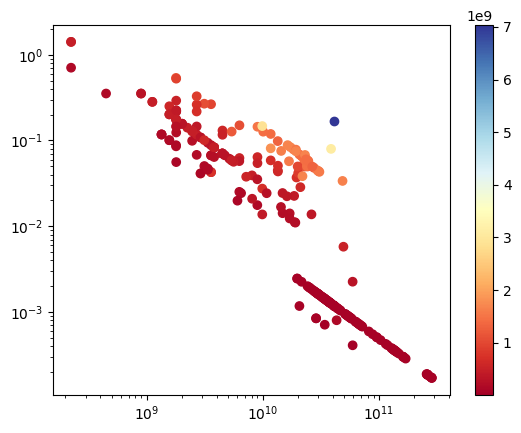

In [8]:
x = np.array([cs for (cs, ss, ps, ok) in stats])
y = np.array( [ps/cs for (cs, ss, ps, ok) in stats])
values = np.array([ss for (cs, ss, ps, ok) in stats])
plt.scatter(x, y, c=values, cmap='RdYlBu')
plt.yscale('log')
plt.xscale('log')
#plt.axhline(y=0.5, color='r', linestyle='-.')
plt.colorbar()
plt.show()

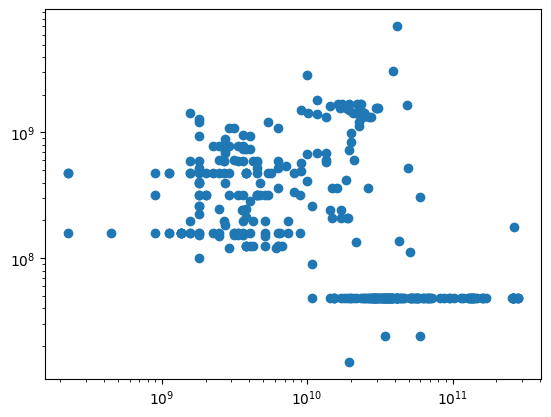

In [6]:
x = np.array([cs for (cs, ss, ps, ok) in stats])
y = np.array([ss for (cs, ss, ps, ok) in stats])
#colors = np.array([ss for (cs, ss, ps) in stats])
plt.scatter(x, y)
plt.yscale('log')
plt.xscale('log')
#plt.axhline(y=0.5, color='r', linestyle='-.')
#plt.colorbar()
plt.show()

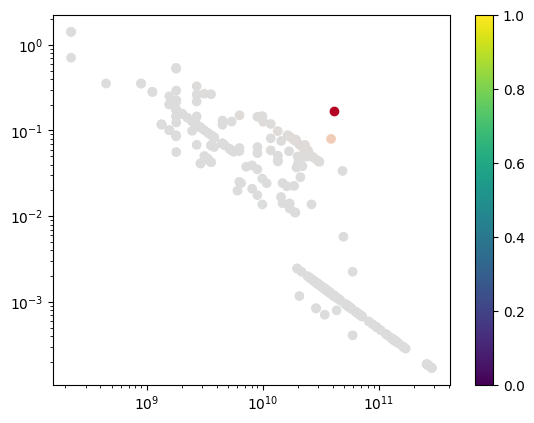

In [11]:
x = np.array([cs for (cs, ss, ps, ok) in stats])
y = np.array( [ps/cs for (cs, ss, ps, ok) in stats])
cs = np.array([ok for (cs, ss, ps, ok) in stats])
norm = colors.CenteredNorm()
cmap=cm.coolwarm(norm(cs))
plt.scatter(x, y, c=cmap)
plt.yscale('log')
plt.xscale('log')
plt.colorbar()
plt.show()